In [2]:
# Reading in Rasters
# Rasterio tutorial here: 
#https://automating-gis-processes.github.io/CSC18/lessons/L6/reading-raster.html

# First, load packages
import pandas as pd
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import numpy as np
import shapely as sp
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

os.chdir("/Users/anayahall/projects/grapevine")

from scripts.fxns import epsg_meters

# import matplotlib.pyplot as plt

# from geopandas import GeoSeries, GeoDataFrame
# # only for jupyter nb to show plots inline
%matplotlib inline 


In [3]:
# now load SHAPEFILE for all CA COUNTIES to merge this
county_wp = gpd.read_file("data/raw/CA_Counties/CA_Counties_TIGER2016.shp")

print(county_wp.crs)
# county.head()

county = epsg_meters(county_wp)

print(county.crs)

{'init': 'epsg:3857'}
{'init': 'epsg:3310', 'no_defs': True}


In [4]:
# os.chdir("/Volumes/My Passport/CAland")
gl_wp = gpd.read_file("data/raw/CA_FMMP_G/gl_bycounty/grazingland_county.shp")
gl = epsg_meters(gl_wp)
gl.crs

{'init': 'epsg:3310', 'no_defs': True}

,OBJECTID,county_nam,Shape_Leng,Shape_Area,geometry
0,1,ala,9.501047e+05,9.875655e+08,(POLYGON ((-176783.7906403203 -53821.029178032...
1,2,ama,1.387017e+06,7.625616e+08,(POLYGON ((-77074.95649520446 25103.9228865886...
2,3,but,2.309820e+06,1.630879e+09,(POLYGON ((-134175.4554734436 145902.335382080...
3,4,col,2.617749e+05,3.707176e+07,(POLYGON ((-198268.112932426 103432.9897921067...
4,5,con,1.779043e+06,6.824868e+08,(POLYGON ((-168466.2600871843 -30169.539836267...


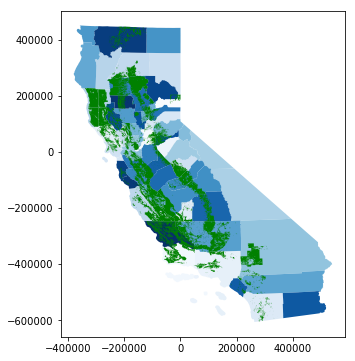

In [6]:
# quick plot
gl.plot(ax=county.plot(cmap='Blues', figsize=(10, 6)), color = 'green')
gl.head()

In [16]:
# get area in meters
gl["area_km"] = gl['geometry'].area/ 10**6


# estimate centroid
gl['centroid'] = gl['geometry'].centroid

gl.head()

,OBJECTID,county_nam,Shape_Leng,Shape_Area,geometry,area,centroid
0,1,ala,9.501047e+05,9.875655e+08,(POLYGON ((-176783.7906403203 -53821.029178032...,987.567586,POINT (-155981.0545710327 -41492.90844585943)
1,2,ama,1.387017e+06,7.625616e+08,(POLYGON ((-77074.95649520446 25103.9228865886...,762.558361,POINT (-71557.81928164458 44240.48207744459)
2,3,but,2.309820e+06,1.630879e+09,(POLYGON ((-134175.4554734436 145902.335382080...,1630.900610,POINT (-131265.0339115032 189461.884414018)
3,4,col,2.617749e+05,3.707176e+07,(POLYGON ((-198268.112932426 103432.9897921067...,37.071282,POINT (-208085.5145129747 133084.6585528095)
4,5,con,1.779043e+06,6.824868e+08,(POLYGON ((-168466.2600871843 -30169.539836267...,682.486619,POINT (-172617.973385567 -11403.98050054485)


In [20]:
# gl.groupby(['county_nam'])

,OBJECTID,Shape_Leng,Shape_Area,geometry,area,centroid
county_nam,,,,,,
ala,1,9.501047e+05,9.875655e+08,(POLYGON ((-176783.7906403203 -53821.029178032...,987.567586,POINT (-155981.0545710327 -41492.90844585943)
ama,2,1.387017e+06,7.625616e+08,(POLYGON ((-77074.95649520446 25103.9228865886...,762.558361,POINT (-71557.81928164458 44240.48207744459)
but,3,2.309820e+06,1.630879e+09,(POLYGON ((-134175.4554734436 145902.335382080...,1630.900610,POINT (-131265.0339115032 189461.884414018)
col,4,2.617749e+05,3.707176e+07,(POLYGON ((-198268.112932426 103432.9897921067...,37.071282,POINT (-208085.5145129747 133084.6585528095)
con,5,1.779043e+06,6.824868e+08,(POLYGON ((-168466.2600871843 -30169.539836267...,682.486619,POINT (-172617.973385567 -11403.98050054485)
eld,6,3.840287e+05,4.030051e+07,(POLYGON ((-51305.83775389128 56804.5661322851...,40.300881,POINT (-69123.42287236452 73272.38940243825)
fre,9,1.909662e+06,3.341701e+09,(POLYGON ((-15932.66809175932 -213007.68351737...,3341.824381,POINT (-7726.56303015534 -166950.5794483667)
gle,10,5.647286e+05,2.536739e+08,(POLYGON ((-210706.9380246829 177922.485352013...,253.673706,POINT (-215716.4404880065 167113.5498810937)
ker,22,7.799170e+06,7.395186e+09,(POLYGON ((101729.6776928209 -356423.704991861...,7395.269377,POINT (94805.46771040946 -299031.9083235687)


In [91]:
# lc = "data/interim/CAMLC2010/California Augmented Multisource Landcover 20101.tif"

# raster = rasterio.open(lc)
# # type(raster)

# county = county.to_crs(crs=raster.crs.data)

# # # info about raster
# print("raster crs: ", raster.crs)
# # print("*********")
# # print("raster bounds: ", raster.bounds)
# # print("*********")
# # print("count: ", raster.count)
# # print("*********")
# # print("driver: ", raster.driver)
# # print("*********")
# # print("metadata: ", raster.meta)

# def getFeatures(gdf):
#     """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
#     import json
#     return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [92]:
# coords = getFeatures(county)
# print(coords)

In [93]:
# out_img, out_transform = mask(raster, shapes=coords, crop=True)

In [94]:
# out_meta = raster.meta.copy()
# print(out_meta)

In [95]:
# epsg_code = int(raster.crs.data[''][5:])
# print(raster.crs.data)
# print(epsg_code)